# Analyse de données du fichier 'EdStatsData.csv'

In [ ]:
iopub_data_rate_limit=1.0e10
import statistics
import matplotlib.pyplot as plt
import numpy as np

Version Google Colab(import du DataFrame)


In [ ]:
#import pandas as pd
#use_colab=True
#if use_colab:
  #from google.colab import drive
  #drive.mount('/content/drive')
#df = pd.read_csv ('/content/drive/MyDrive/Projet OpenClassrooms/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv') 
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None) #affichage de toutes les lignes
#pd.set_option('max_colwidth', 300)





Mounted at /content/drive


Version Notebook

In [ ]:
import pandas as pd
df = pd.read_csv('EdStatsData.csv')

Colonne doublon crée, si la valeur retournée est False, il n'y a pas de doublon


In [ ]:
df["doublon"]= df.duplicated()


On observe qu'il n'y a pas de doublons.

In [ ]:
df1=df
Doublons=len(df1)-len(df1.drop_duplicates())
print(Doublons)

0


On observe qu'il y a 886930 lignes et 70 colonnes

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 71 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Cette fonction permet de voir si des colonnes ont des données manquantes

In [ ]:
df1.isnull().any()


Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1970               True
1971               True
1972               True
1973               True
1974               True
1975               True
1976               True
1977               True
1978               True
1979               True
1980               True
1981               True
1982               True
1983               True
1984               True
1985               True
1986               True
1987               True
1988               True
1989               True
1990               True
1991               True
1992               True
1993               True
1994               True
1995               True
1996               True
1997               True
1998               True
1999               True
2000               True
2001               True
2002               True
2003               True
2004               True
2005               True
2006               True
2007            

On peut voir le nombres de données manquantes par colonne, on supprime Unnamed.

In [ ]:
df1.drop(['Unnamed: 69'], axis = 1, inplace = True )




On séléctionne ici la colonne 'doublon'

In [ ]:
df1.isnull().sum()


Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
1971              851393
1972              851311
1973              851385
1974              851200
1975              799624
1976              849447
1977              849356
1978              849354
1979              850121
1980              797808
1981              848153
1982              849419
1983              848470
1984              848324
1985              796634
1986              847558
1987              848289
1988              848378
1989              849390
1990              762525
1991              812493
1992              811387
1993              811137
1994              809468
1995              755569
1996              810123
1997              813477
1998              802016
1999              768091
2000              710254
2001              763421
2002              762725
2003              756567
2004              758116
2005              702822


Pour notre étude de cas, on va s'interesser aux données de l' année 2020 


In [ ]:
Copy= df1[['Country Code','Country Name','Indicator Name','2020','2025']]

Copy2 =Copy.dropna()


On constate ici que les populations occidentales et asiatiques ont le plus d'années études,
en se basant sur l'année 2020

<A HREF="http://www.wittgensteincentre.org/">Le centre de Wittgenstein</A>
 est un centre faisant des prédicitons sur les populations mondiales, on y retrouve des démographes.
Dans le tableau ci-dessous on retrouve la moyenne des années d'éducation d'une population donnée. Pour 2020, la moyenne 
des années d'éducation est de 8 ans environ.





In [ ]:
 Liste1=Copy2[Copy2['Indicator Name'].str.contains('schooling. Age ')]
pd.set_option('display.max_rows', None)
Liste1.sort_values(by=['Country Code'])



Output hidden; open in https://colab.research.google.com to view.

La fonction describe() permet d'observer des valeurs comme l'écart type, la moyenne et la médiane des pays.

Ces valeurs sont affichées en dessous.

Pour rappel :
En mathématiques, l’écart type (aussi orthographié écart-type) est une mesure de la dispersion des valeurs d'un échantillon statistique ou d'une distribution de probabilité

La médiane est le point milieu d'un jeu de données, de sorte que 50 % des unités ont une valeur inférieure ou égale à la médiane et 50 % des unités ont une valeur supérieure ou égale

In [ ]:
Liste1.describe()

,2020,2025
count,6012.000000,6012.00000
mean,8.084381,8.45326
std,3.733173,3.68106
min,0.000000,0.00000
25%,5.200000,5.90000
50%,8.900000,9.20000
75%,11.000000,11.30000
max,15.800000,16.00000


On va étudier ici chaque pays individuellement mais avant cela on va voir ,via les fichiers précédents ,si le pays en question à un niveau de revenus suffisant pour notre projet. On prendra donc ici en considération que les pays ayant un revenu haut.

In [ ]:
n=10
StockPays1=[]
StockMoyennes=[]
annee= input("Année: ") 
for i in range(n):
    
    pays = input("Enter string:")
    

    Tab1=Liste1[Liste1['Country Code'].str.contains(pays)]
    Tab2=Tab1[annee]
    moyenne=(sum(Tab2)/len(Tab2))
    StockMoyennes.append(moyenne)
    StockPays1.append(pays)
    resultat=Tab2.describe()
    display(resultat)
    print ("Moyenne: ",moyenne)
    


Année: 2020
Enter string:ARE


count    36.000000
mean      8.958333
std       2.722223
min       2.300000
25%       8.975000
50%       9.550000
75%      10.600000
max      12.300000
Name: 2020, dtype: float64

Moyenne:  8.958333333333334
Enter string:ABW


count    36.000000
mean      8.327778
std       2.268871
min       2.200000
25%       7.675000
50%       9.300000
75%       9.650000
max      10.900000
Name: 2020, dtype: float64

Moyenne:  8.327777777777781
Enter string:AUS


count    36.000000
mean     11.825000
std       3.024507
min       2.900000
25%      11.075000
50%      12.650000
75%      13.550000
max      15.000000
Name: 2020, dtype: float64

Moyenne:  11.825
Enter string:AUT


count    36.000000
mean     11.122222
std       3.036644
min       2.200000
25%      10.750000
50%      12.300000
75%      12.825000
max      13.500000
Name: 2020, dtype: float64

Moyenne:  11.122222222222222
Enter string:BEL


count    36.000000
mean     11.141667
std       3.105422
min       2.400000
25%       9.950000
50%      12.250000
75%      13.150000
max      14.500000
Name: 2020, dtype: float64

Moyenne:  11.141666666666667
Enter string:BHR


count    36.000000
mean      8.975000
std       3.111029
min       2.000000
25%       7.875000
50%      10.050000
75%      11.000000
max      12.900000
Name: 2020, dtype: float64

Moyenne:  8.975000000000001
Enter string:CAN


count    36.000000
mean     12.575000
std       3.182845
min       2.700000
25%      12.650000
50%      13.750000
75%      14.125000
max      14.900000
Name: 2020, dtype: float64

Moyenne:  12.575
Enter string:CHE


count    36.000000
mean     11.633333
std       3.081002
min       2.300000
25%      11.775000
50%      12.700000
75%      13.225000
max      13.800000
Name: 2020, dtype: float64

Moyenne:  11.633333333333333
Enter string:FRA


count    36.000000
mean     10.438889
std       2.868975
min       2.400000
25%       9.625000
50%      11.300000
75%      12.225000
max      13.700000
Name: 2020, dtype: float64

Moyenne:  10.438888888888888
Enter string:USA


count    36.000000
mean     11.758333
std       2.972000
min       2.500000
25%      12.300000
50%      12.850000
75%      13.100000
max      13.500000
Name: 2020, dtype: float64

Moyenne:  11.758333333333333


On répéte donc ce processus pour tout les pays ayant un haut revenu, pour des raisons de delais sur ce projet, on ne regardera pas tout les pays mais cependant on peut en conclure que les pays Europeens et americains sont nos meilleurs candidats pour le projet. Cependant, en se projetant sur l'année 2025 on constatera qu'il est prévu une augmentation des années de scolarité chez les élèves dans des pays tels que l'Arabie Saoudite et Aruba, on doit donc en tenir compte pour notre étude.


Ici on regarde le pourcentage des eleves ayant ete a l'universite pour chaque pays, on additionne les pourcentages pour chaque tranche d'age et on pourra en tirer des conclusions.

In [ ]:
ListeS=Copy2[Copy2['Indicator Name'].str.contains('Post Secondary')]
ListeS2=ListeS[ListeS['Indicator Name'].str.contains('Percentage')]


In [ ]:

StockPourcentage=[]
StockPays2=[]
annee= input("Année: ") 
for pays2 in StockPays1:
    pays2 = input("Enter string:")
    Tab1=ListeS2[ListeS2['Country Code'].str.contains(pays2)]
    Tab2=Tab1[annee]
    Pourcentage=sum(Tab2)
    StockPourcentage.append(Pourcentage)
    StockPays2.append(pays2)
    resultat=Tab2.describe()
    print(resultat)
    print("Pourcentage: ",Pourcentage) #todo : enlever tout les espaces vides 

Année: 2020
Enter string:ARE
count    33.000000
mean      0.173939
std       0.087462
min       0.000000
25%       0.140000
50%       0.180000
75%       0.220000
max       0.340000
Name: 2020, dtype: float64
Pourcentage:  5.740000000000002
Enter string:ABW
count    33.000000
mean      0.208485
std       0.103021
min       0.000000
25%       0.150000
50%       0.240000
75%       0.280000
max       0.390000
Name: 2020, dtype: float64
Pourcentage:  6.880000000000001
Enter string:AUS
count    33.000000
mean      0.317273
std       0.124757
min       0.010000
25%       0.280000
50%       0.330000
75%       0.400000
max       0.540000
Name: 2020, dtype: float64
Pourcentage:  10.469999999999999
Enter string:AUT
count    33.000000
mean      0.259091
std       0.113588
min       0.020000
25%       0.230000
50%       0.280000
75%       0.330000
max       0.470000
Name: 2020, dtype: float64
Pourcentage:  8.550000000000002
Enter string:BEL
count    33.000000
mean      0.353636
std       0.164066
m

Text(0.5, 1.0, 'affichage du pourcentage  des étudiants au niveau scolaire universitaire pour chaque pays')

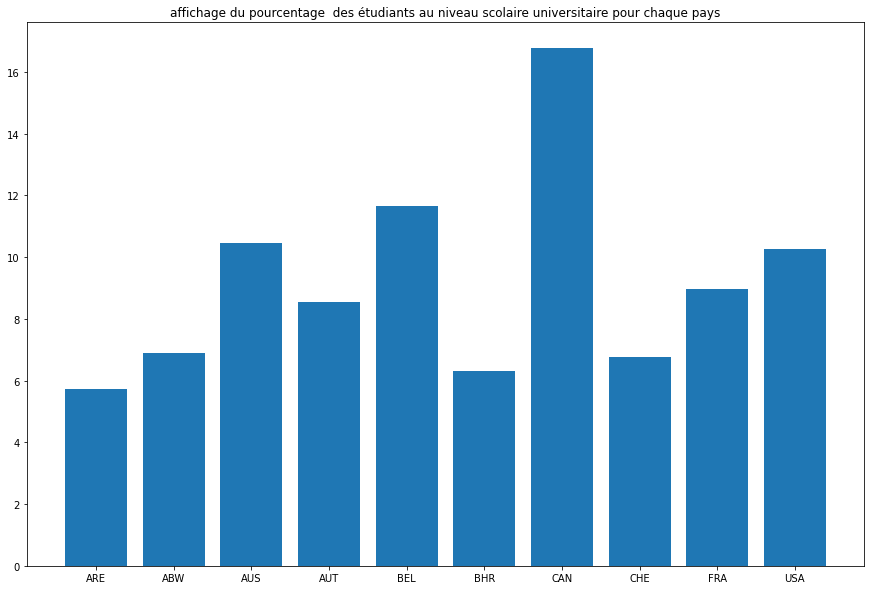

In [ ]:
xs = StockPays2
labels = ['ARE','ABW','AUS','AUT','BEL','BHR','CAN','CHE','FRA','USA']
ys=StockPourcentage
plt.figure(figsize=(15, 10))
plt.bar(xs,ys)
plt.title('affichage du pourcentage  des étudiants au niveau scolaire universitaire pour chaque pays')



In [ ]:

StockPays3=[]
StockMoyennes1=[]
annee= input("Année: ") 
for pays3 in StockPays1:
    
    pays3 = input("Enter string:")
    

    Tab1=Liste1[Liste1['Country Code'].str.contains(pays)]
    Tab2=Tab1[annee]
    moyenne=(sum(Tab2)/len(Tab2))
    StockMoyennes1.append(moyenne)
    StockPays3.append(pays)
    resultat=Tab2.describe()
    display(resultat)
    print ("Moyenne: ",moyenne)
    


Année: 2025
Enter string:ARE


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:ABW


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:AUS


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:AUT


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:BEL


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:BHR


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:CAN


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:CHE


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:FRA


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553
Enter string:USA


count    36.000000
mean     11.880556
std       2.979916
min       2.600000
25%      12.550000
50%      12.950000
75%      13.200000
max      13.600000
Name: 2025, dtype: float64

Moyenne:  11.880555555555553


Text(0.5, 1.0, 'affichage du nombre des années de scolarisation pour chaque pays en 2025')

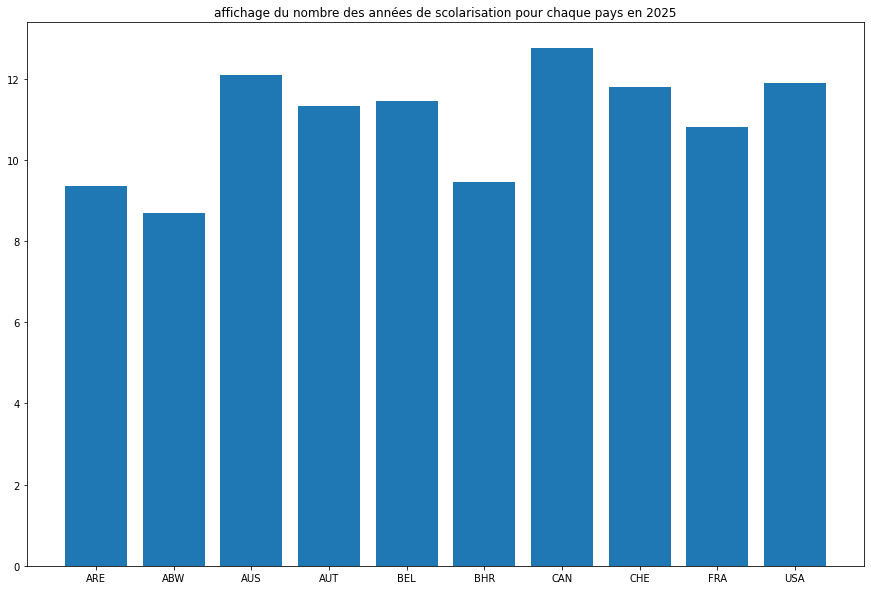

In [ ]:
xs = StockPays3
labels = ['ARE','ABW','AUS','AUT','BEL','BHR','CAN','CHE','FRA','USA']
ys=StockMoyennes1
plt.figure(figsize=(15, 10))
plt.bar(xs,ys)

plt.title('affichage du nombre des années de scolarisation pour chaque pays en 2025')


In [ ]:

StockPourcentage1=[]
StockPays4=[]
annee= input("Année: ") 
for pays4 in StockPays1:

    pays4 = input("Enter string:")


    Tab1=ListeS2[ListeS2['Country Code'].str.contains(pays2)]
    Tab2=Tab1[annee]
    Pourcentage=sum(Tab2)
    StockPourcentage1.append(Pourcentage)
    StockPays4.append(pays2)
    resultat=Tab2.describe()
    print(resultat)
    print("Pourcentage: ",Pourcentage)

Année: 2025
Enter string:ARE
count    33.000000
mean      0.327273
std       0.121508
min       0.000000
25%       0.290000
50%       0.360000
75%       0.400000
max       0.470000
Name: 2025, dtype: float64
Pourcentage:  10.799999999999999
Enter string:ABW
count    33.000000
mean      0.327273
std       0.121508
min       0.000000
25%       0.290000
50%       0.360000
75%       0.400000
max       0.470000
Name: 2025, dtype: float64
Pourcentage:  10.799999999999999
Enter string:AUS
count    33.000000
mean      0.327273
std       0.121508
min       0.000000
25%       0.290000
50%       0.360000
75%       0.400000
max       0.470000
Name: 2025, dtype: float64
Pourcentage:  10.799999999999999
Enter string:AUT
count    33.000000
mean      0.327273
std       0.121508
min       0.000000
25%       0.290000
50%       0.360000
75%       0.400000
max       0.470000
Name: 2025, dtype: float64
Pourcentage:  10.799999999999999
Enter string:BEL
count    33.000000
mean      0.327273
std       0.12150

Text(0.5, 1.0, 'affichage du pourcentage  des étudiants au niveau scolaire universitaire pour chaque pays en 2025')

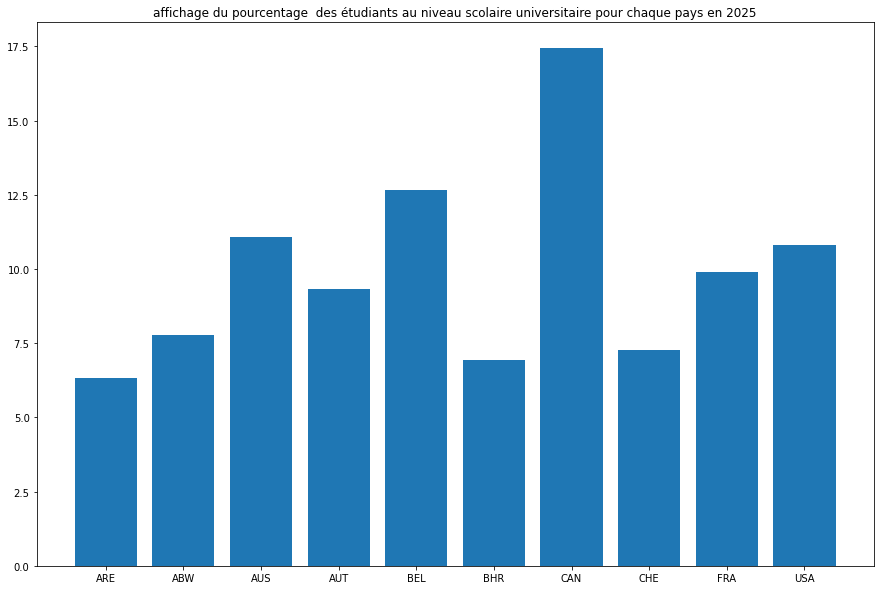

In [ ]:
xs = StockPays4
labels = ['ARE','ABW','AUS','AUT','BEL','BHR','CAN','CHE','FRA','USA']
ys=StockPourcentage1
plt.figure(figsize=(15, 10))
plt.bar(xs,ys)
plt.title('affichage du pourcentage  des étudiants au niveau scolaire universitaire pour chaque pays en 2025')



On peut établir à partir de toutes nos données ci-dessus que les statistiques obtenus via la fonction describe sont utilisables.
L'écart-type est relativement faible et la médiane a une valeur proche de la moyenne. On en conclut donc qu'il n'y a pas une dispersion importante de nos valeurs sur le pourcentages d'élèves à l'université et le nombre d'années de scolarité pour les pays à haut revenus étudiés ici.


A partir des données scolaires de l'année 2020 et des prévisions pour l'année 2025, on a la confirmation que l'Europe et les pays d'Amérique du Nord sont d'excellents candidats. Comme dit précedemment, des pays comme Aruba, le Bahrein et l'Arabie Saoudite sont des pays à potentiel intéressant pour déployer notre formation.